In [6]:
# Intro to Machine Learning CS 4347   Chichi Christine
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import classification_report

In [7]:
df = pd.read_csv("train.csv")

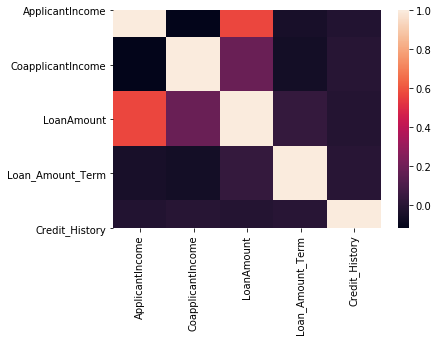

In [3]:
corr = df.corr()
sns.heatmap(corr)

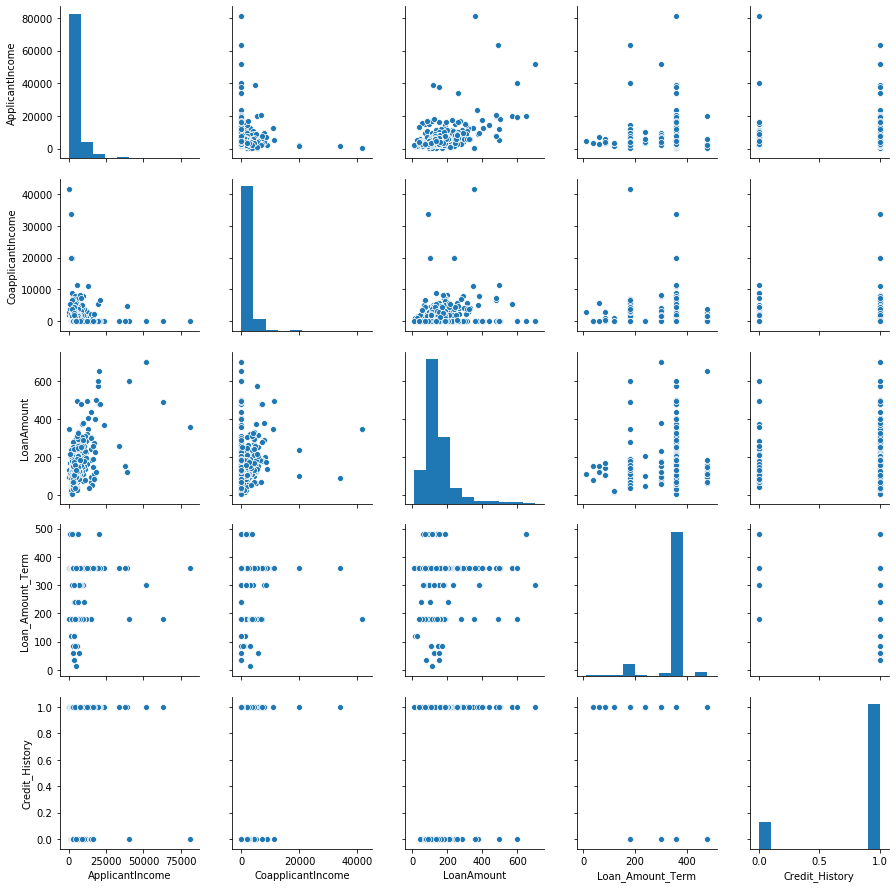

In [8]:
sns.pairplot(df)

In [3]:
df.Gender = df.Gender.fillna('Male')
df.Married = df.Married.fillna('Yes')
df.Dependents = df.Dependents.fillna('0')
df.Self_Employed = df.Self_Employed.fillna('No')
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)
df.Credit_History = df.Credit_History.fillna(1.0)
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanStatus           0
dtype: int64

In [4]:
df.shape

(614, 13)

In [9]:
#To select rows whose column value equals 'Y'
df.loc[df['LoanStatus'] == 'Y']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanStatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y


In [4]:
y = df['LoanStatus']

In [5]:
x_data = df.drop(['LoanStatus'], axis=1)
df = df.drop(['Loan_ID'], axis=1)  # drop the column

x_subset= x_data.drop(['Loan_ID'],axis=1)
x_subset= x_subset.drop(['Property_Area'],axis=1)
x_subset= x_subset.drop(['Gender'],axis=1)
x_subset= x_subset.drop(['Married'],axis=1)
x_subset= x_subset.drop(['Dependents'],axis=1)
x_subset= x_subset.drop(['Education'],axis=1)
x_subset= x_subset.drop(['Self_Employed'],axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x_subset)
x_sc

array([[ 0.07299082, -0.55448733,  0.        ,  0.2732313 ,  0.41173269],
       [-0.13441195, -0.03873155, -0.21927331,  0.2732313 ,  0.41173269],
       [-0.39374734, -0.55448733, -0.957641  ,  0.2732313 ,  0.41173269],
       ...,
       [ 0.43717437, -0.47240418,  1.26937121,  0.2732313 ,  0.41173269],
       [ 0.35706382, -0.55448733,  0.4833669 ,  0.2732313 ,  0.41173269],
       [-0.13441195, -0.55448733, -0.15972753,  0.2732313 , -2.42876026]])

In [7]:
# Clean data
# Replace the categorical values with the numeric equivalents 
categoricalFeatures = [ 'Property_Area', 'Gender', 'Married', 
                       'Dependents', 'Education', 'Self_Employed']

# Iterate through the list of categorical features and one hot encode them.
for feature in categoricalFeatures:
    onehot = pd.get_dummies(df[feature], prefix=feature)
    df = df.drop(feature, axis=1)  # drop the column
    df = df.join(onehot)

In [8]:
y = (y == 'Y')*1.0
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: LoanStatus, dtype: float64

In [9]:
numericalFeatures = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                     'Loan_Amount_Term', 'Credit_History']
num = 0
for feature in numericalFeatures:
    sub = x_sc[:,num]
    df = df.drop(feature, axis=1)
    df[feature] = sub
    num += 1


In [10]:
# x.shape,y.shape
x = df.drop(['LoanStatus'], axis=1)
x.head()

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0.072991,-0.554487,0.000000,0.273231,0.411733
1,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,-0.134412,-0.038732,-0.219273,0.273231,0.411733
2,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,-0.393747,-0.554487,-0.957641,0.273231,0.411733
3,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,-0.462062,0.251980,-0.314547,0.273231,0.411733
4,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0.097728,-0.554487,-0.064454,0.273231,0.411733


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
# Fitting The Model 

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import maxnorm
from keras import optimizers

output_dim = 1
model = Sequential()

# input layer
model.add(Dense(100, input_dim=20, 
                activation='relu', 
                kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
    
# hidden layer
model.add(Dense(60, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(60, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))

# output layer
model.add(Dense(output_dim, activation='sigmoid'))

# Compile model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, nesterov=True)
model.compile(loss='binary_crossentropy', 
              optimizer=sgd, metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=145,
          batch_size=40)
score = model.evaluate(x_test, y_test, batch_size=50)
score



Using TensorFlow backend.


Epoch 1/145
491/491 [==============================] - 1s 1ms/step - loss: 0.6734 - accuracy: 0.6701
Epoch 2/145
491/491 [==============================] - 0s 300us/step - loss: 0.6598 - accuracy: 0.6741
Epoch 3/145
491/491 [==============================] - 0s 406us/step - loss: 0.6478 - accuracy: 0.6843
Epoch 4/145
491/491 [==============================] - 0s 255us/step - loss: 0.6502 - accuracy: 0.6904
Epoch 5/145
491/491 [==============================] - 0s 159us/step - loss: 0.6289 - accuracy: 0.6904
Epoch 6/145
491/491 [==============================] - 0s 159us/step - loss: 0.6344 - accuracy: 0.6884
Epoch 7/145
491/491 [==============================] - 0s 191us/step - loss: 0.6300 - accuracy: 0.6904
Epoch 8/145
491/491 [==============================] - 0s 191us/step - loss: 0.6153 - accuracy: 0.6925
Epoch 9/145
491/491 [==============================] - 0s 191us/step - loss: 0.6195 - accuracy: 0.6904
Epoch 10/145
491/491 [==============================] - 0s 255us/step - los

[0.47246833884619116, 0.8130081295967102]

In [24]:
# save and test model
from keras.models import model_from_json
import os

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")


In [25]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
sgd = optimizers.SGD(lr=0.01, decay=1e-6, nesterov=True)
loaded_model.compile(loss='binary_crossentropy', 
              optimizer=sgd, metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, batch_size=50)
score

Loaded model from disk


ValueError: Error when checking input: expected dense_1_input to have shape (20,) but got array with shape (10,)

In [13]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [14]:
y_pred = classifier.predict(x_test)
print('Accuracy: ', metrics.accuracy_score(y_pred, y_test))

Accuracy:  0.7398373983739838


In [15]:
# Get numerical feature importances
importances = list(zip(classifier.feature_importances_))
# List of tuples with variable and importance
feature_importances = [(feature, importance) for feature, importance in zip(x_train, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Credit_History       Importance: (0.2506722960500085,)
Variable: ApplicantIncome      Importance: (0.18650031635592265,)
Variable: LoanAmount           Importance: (0.16224812298018157,)
Variable: CoapplicantIncome    Importance: (0.13541440923514428,)
Variable: Loan_Amount_Term     Importance: (0.03635487096900466,)
Variable: Education_Graduate   Importance: (0.022739673460340386,)
Variable: Dependents_0         Importance: (0.018455214995058138,)
Variable: Property_Area_Semiurban Importance: (0.01772707278580222,)
Variable: Property_Area_Rural  Importance: (0.01691623292830908,)
Variable: Dependents_2         Importance: (0.016161625417516548,)
Variable: Married_No           Importance: (0.015867240809201676,)
Variable: Property_Area_Urban  Importance: (0.015193743303044465,)
Variable: Dependents_3+        Importance: (0.014887633927819128,)
Variable: Married_Yes          Importance: (0.014013040052718043,)
Variable: Self_Employed_Yes    Importance: (0.013979869566266187,)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [16]:
# For NN, Remove less relevant features: Gender and Dependents, 
# Self_Employed, Married
# Create df, standardize numerical features, onehot encode 
# categorical features. Create list from Random Forest.
# Continue here
x3 = list(['Property_Area_Rural']+['Property_Area_Semiurban']+['Property_Area_Urban']
          + ['Education_Graduate']+ ['Education_Not Graduate'] 
          + ['ApplicantIncome'] + ['CoapplicantIncome']+ ['LoanAmount']
             +['Loan_Amount_Term'] +['Credit_History'])
df3 = df[x3]
xtree = df3
xtree.head()

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Education_Graduate,Education_Not Graduate,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,0,1,1,0,0.072991,-0.554487,0.000000,0.273231,0.411733
1,1,0,0,1,0,-0.134412,-0.038732,-0.219273,0.273231,0.411733
2,0,0,1,1,0,-0.393747,-0.554487,-0.957641,0.273231,0.411733
3,0,0,1,0,1,-0.462062,0.251980,-0.314547,0.273231,0.411733
4,0,0,1,1,0,0.097728,-0.554487,-0.064454,0.273231,0.411733


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xtree, y, test_size=0.2)

Epoch 1/145
491/491 [==============================] - 1s 1ms/step - loss: 0.6986 - accuracy: 0.4807
Epoch 2/145
491/491 [==============================] - 0s 223us/step - loss: 0.6754 - accuracy: 0.6334
Epoch 3/145
491/491 [==============================] - 0s 286us/step - loss: 0.6691 - accuracy: 0.6680
Epoch 4/145
491/491 [==============================] - 0s 255us/step - loss: 0.6547 - accuracy: 0.7149
Epoch 5/145
491/491 [==============================] - 0s 191us/step - loss: 0.6450 - accuracy: 0.7169
Epoch 6/145
491/491 [==============================] - 0s 191us/step - loss: 0.6403 - accuracy: 0.7210
Epoch 7/145
491/491 [==============================] - 0s 223us/step - loss: 0.6299 - accuracy: 0.7291
Epoch 8/145
491/491 [==============================] - 0s 255us/step - loss: 0.6263 - accuracy: 0.7210
Epoch 9/145
491/491 [==============================] - 0s 223us/step - loss: 0.6213 - accuracy: 0.7352
Epoch 10/145
491/491 [==============================] - 0s 255us/step - los

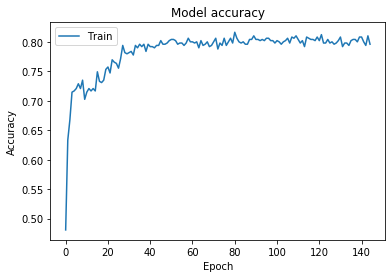

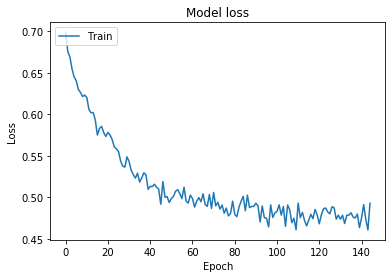

In [19]:
# Fitting The Model 

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import maxnorm
from keras import optimizers

output_dim = 1
model2 = Sequential()

# input layer
model2.add(Dense(100, input_dim=10, 
                activation='relu', 
                kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
    
# hidden layer
model2.add(Dense(60, activation='relu', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))

# hidden layer
model2.add(Dense(60, activation='relu', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))

# output layer
model2.add(Dense(output_dim, activation='sigmoid'))

# Compile model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, nesterov=True)
model2.compile(loss='binary_crossentropy', 
              optimizer=sgd, metrics=['accuracy'])

history = model2.fit(x_train, y_train,
          epochs=145,
          batch_size=40, verbose =1)

# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [20]:
score = model2.evaluate(x_test, y_test, batch_size=50)
score

123/123 [==============================] - 0s 1ms/step


[0.40078458359571006, 0.8536585569381714]

In [26]:
#save and test the model
from keras.models import model_from_json
import os

# serialize model to JSON
model2_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model2_json)
# serialize weights to HDF5
model2.save_weights("model2.h5")


In [27]:
#test the model
from keras.models import model_from_json
import os
from keras import optimizers

# load json and create model
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model2.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
sgd = optimizers.SGD(lr=0.01, decay=1e-6, nesterov=True)
loaded_model.compile(loss='binary_crossentropy', 
              optimizer=sgd, metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, batch_size=50)
score

Loaded model from disk
123/123 [==============================] - 0s 889us/step


[0.40078458359571006, 0.8536585569381714]

In [24]:
# Print precision, recall and f1 score
y_pred = loaded_model.predict(x_test, batch_size=50, verbose=1)
y_pred = np.around(y_pred)
#y_pred
print(classification_report(y_test, y_pred))

123/123 [==============================] - 0s 65us/step
              precision    recall  f1-score   support

         0.0       0.94      0.46      0.62        37
         1.0       0.81      0.99      0.89        86

    accuracy                           0.83       123
   macro avg       0.88      0.72      0.75       123
weighted avg       0.85      0.83      0.81       123

